# Read data

In [13]:
import pandas as pd
df = pd.read_csv('./data/real_estate.csv')
df

,transaction_date,house_age,transit_distance,local_convenience_stores,latitude,longitude,price_per_unit
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...
409,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5


In [14]:
df.describe()

,transaction_date,house_age,transit_distance,local_convenience_stores,latitude,longitude,price_per_unit
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


# Plot

Histogram plot function

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot_histogram(y, xlabel):
  # Plot the histogram
  plt.hist(y, bins=100)
  plt.axvline(y.mean(), color='magenta', linestyle='dashed', linewidth=2)
  plt.axvline(y.median(), color='cyan', linestyle='dashed', linewidth=2)
  plt.xlabel(xlabel)
  plt.ylabel('Count')
  plt.show()


Plot histogram

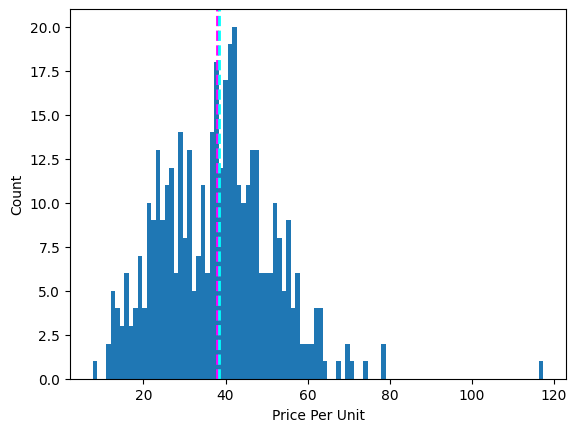

In [16]:
plot_histogram(df.price_per_unit, 'Price Per Unit')

# Remove outliers

In [17]:
price_per_unit_cutoff = df.price_per_unit.quantile(0.997)
df = df[df.price_per_unit < price_per_unit_cutoff]

Plot the histogram after removing the outliers

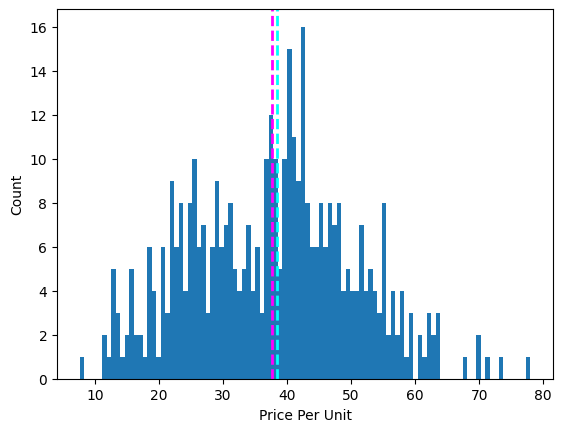

In [18]:
plot_histogram(df.price_per_unit, 'Price Per Unit')

# Pipeline

In [20]:
from sklearn.model_selection import train_test_split

X, y = df[df.columns[1:-1]].values, df[df.columns[-1]].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

Note, this is mostly just a smoke test and not an optimized model

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
import numpy as np

numeric_features = [0,1,3,4]
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
    ])

pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', LinearRegression())])


model = pipeline.fit(X_train, (y_train))
print (model)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [0, 1, 3, 4])])),
                ('regressor', LinearRegression())])


# Evaluate the Model

MSE: 58.733031589039356
RMSE: 7.6637478813593125
R2: 0.5448825564634517


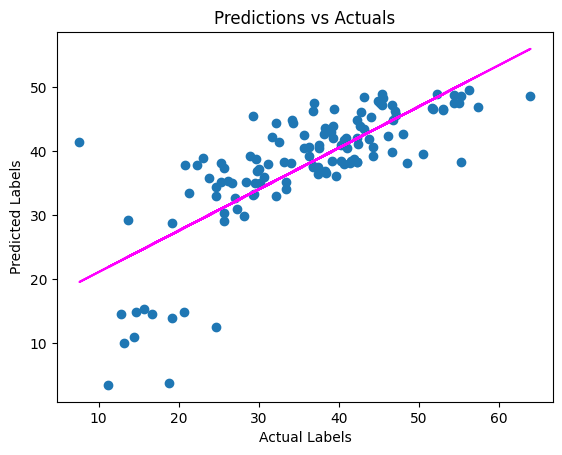

In [22]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
%matplotlib inline

# Get predictions
predictions = model.predict(X_test)

# Display metrics
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Predictions vs Actuals')
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()